In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [134]:
DATA_FOLDER = "DATA/"
FILE_NAME = "mushroom_cleaned.csv"

file_path = DATA_FOLDER + FILE_NAME

In [135]:
mushroom_data = pd.read_csv(file_path)
mushroom_data.head(5)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [136]:
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [137]:
mushroom_data.nunique()

cap-diameter       1847
cap-shape             7
gill-attachment       7
gill-color           12
stem-height        1455
stem-width         3510
stem-color           13
season                4
class                 2
dtype: int64

In [138]:
mushroom_data.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [139]:
mushroom_data["season"].unique()

array([1.80427271, 0.94319455, 0.88845029, 0.02737213])

## Basic training

In [140]:
X = mushroom_data.iloc[:, :-1].values
y = mushroom_data.iloc[:, -1].values

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [142]:
#import random

#random.randint(0, 1000)
## 215

In [143]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

def generate_result(model_name, model):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred=prediction)
    precision = precision_score(y_test, y_pred=prediction)
    f1 = f1_score(y_test, y_pred=prediction)
    return [model_name, accuracy, precision, f1]

In [144]:
def generate_df(results):
    df = pd.DataFrame(results, columns=["name","accuracy", "precision", "f1"])
    df.set_index("name", inplace = True)
    return df

In [145]:
from sklearn.ensemble import RandomForestClassifier

RF_base = RandomForestClassifier(random_state = 215)
RF_result = generate_result("Simple Random Forest",RF_base)
RF_result

['Simple Random Forest',
 0.9907467382252244,
 0.9907376220949815,
 0.9915725602561941]

## Testing impact of number of trees

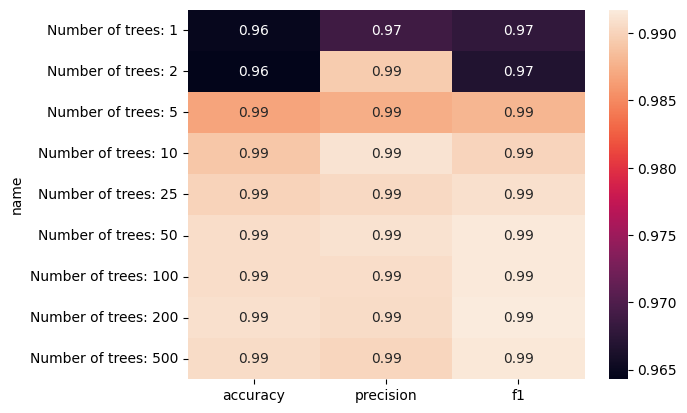

In [146]:
number_of_trees = [1, 2, 5, 10, 25, 50, 100, 200, 500]
results_num_of_trees = []

def test_RF(RF_classifier, result_array, name, param):
    name = name + str(param)
    RF_results = generate_result(name,RF_classifier)
    result_array.append(RF_results)

for number in number_of_trees:
    RF = RandomForestClassifier(n_estimators = number, random_state = 215)
    test_RF(RF, results_num_of_trees, "Number of trees: ", number)

sns.heatmap(generate_df(results_num_of_trees), annot = True)
plt.show()

## Testing impact of bootstrap

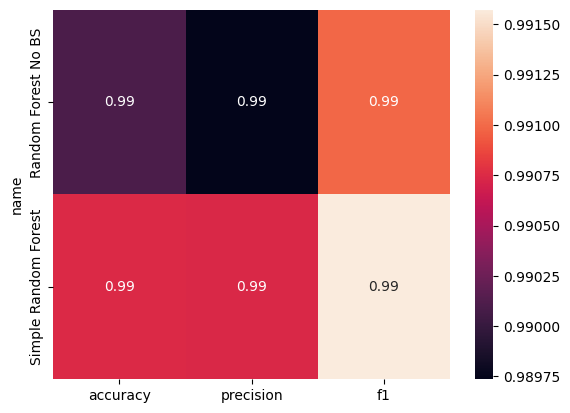

In [147]:
RF_no_bootstrap = RandomForestClassifier(bootstrap = False, random_state = 215)
RF_no_bs_result = generate_result("Random Forest No BS",RF_no_bootstrap)
sns.heatmap(generate_df([RF_no_bs_result, RF_result]), annot = True)
plt.show()

## Testing impact of number of features

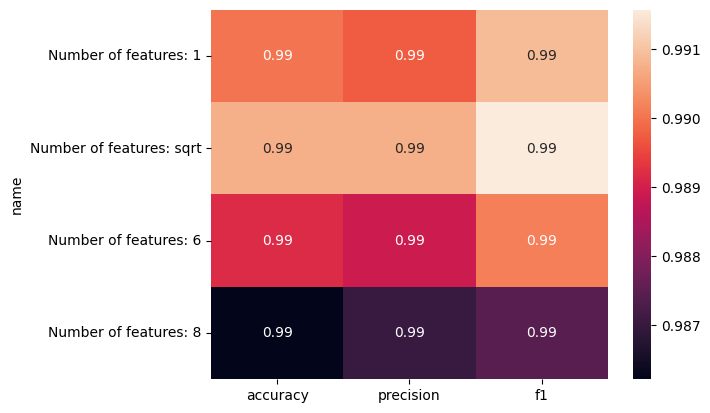

In [148]:
number_of_features = [1, "sqrt", 6, 8]
results_features = []

for number in number_of_features:
    RF = RandomForestClassifier(max_features = number, random_state = 215)
    test_RF(RF, results_features, "Number of features: ", number)
sns.heatmap(generate_df(results_features), annot = True)
plt.show()

## Testing impact of max depth

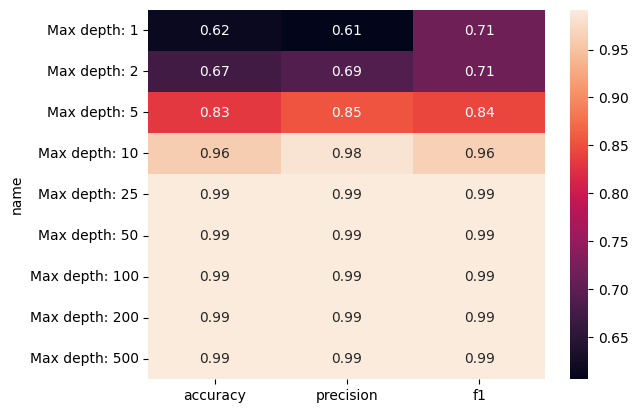

In [149]:
max_depth = [1, 2, 5, 10, 25, 50, 100, 200, 500]
results_depth = []

for number in number_of_trees:
    RF = RandomForestClassifier(max_depth = number, random_state = 215)
    test_RF(RF, results_depth, "Max depth: ", number)
sns.heatmap(generate_df(results_depth), annot = True)
plt.show()

# Comparing with another models

## Decision Tree Classifier

In [150]:
from sklearn.tree import DecisionTreeClassifier
DT_base = DecisionTreeClassifier()
Dt_result = generate_result("Decision Tree",DT_base)
Dt_result

['Decision Tree', 0.9764967150920699, 0.9795469912102772, 0.9785545423843296]

## Logistic Regression

In [151]:
from sklearn.linear_model import LogisticRegression
LR_base = LogisticRegression(max_iter = 10000)
LR_result = generate_result("Logistic Regression",LR_base)
LR_result

['Logistic Regression',
 0.6404182474322199,
 0.6570769230769231,
 0.6873189571934342]

## Support Vector Machines(SVC)

In [152]:
from sklearn.svm import SVC
SVC_base = SVC()
SVC_result = generate_result("SVC",SVC_base)
SVC_result

['SVC', 0.6491163135005089, 0.6719806763285024, 0.6875926841324765]

## Naive Bayes

In [153]:
from sklearn.naive_bayes import GaussianNB
NB_base = GaussianNB()
NB_result = generate_result("Naive Bayes",NB_base)
NB_result

['Naive Bayes', 0.6411585083742019, 0.6578380043116723, 0.6878119465464498]

## K-nearest neighbors

In [154]:
from sklearn.neighbors import KNeighborsClassifier
KNN_base = KNeighborsClassifier()
KNN_result = generate_result("K-nearest neighbors",KNN_base)
KNN_result

['K-nearest neighbors',
 0.7213842879615064,
 0.7469104452344676,
 0.7455851288550909]

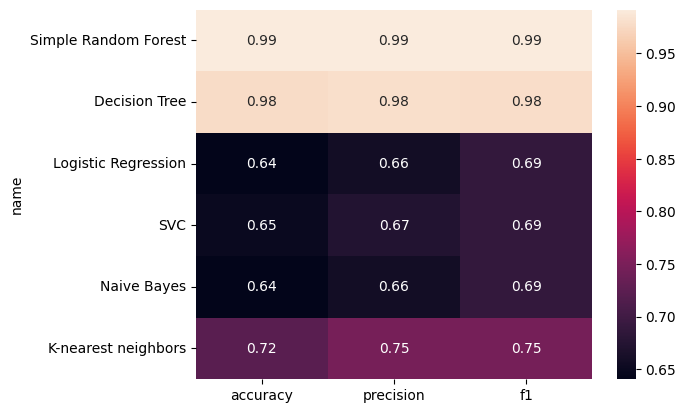

In [155]:
merged_models = [RF_result, Dt_result, LR_result, SVC_result, NB_result, KNN_result]

sns.heatmap(generate_df(merged_models), annot = True)
plt.show()